# PCR via Classification

This has just been copied from experimental. Needs cleaning and whatever - K

In [31]:
#SOME IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PCA

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

'''''

X_df = pd.read_csv("x_classification.csv")
y_df = pd.read_csv("y_classification.csv")

'''

df = pd.read_excel('TrainDataset2024.xls')

df_cleaned = df.replace(999, np.nan)

train_data_pcr = df_cleaned.drop(['ID', 'RelapseFreeSurvival (outcome)'], axis=1)
train_data_pcr = train_data_pcr[~train_data_pcr['pCR (outcome)'].isna()]

# Knn data imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_knn = knn_imputer.fit_transform(train_data_pcr)

data_imputed_knn_df = pd.DataFrame(data_imputed_knn, columns=train_data_pcr.columns)

X_pcr = data_imputed_knn_df.drop(columns=['pCR (outcome)'], axis=1)
y_pcr = data_imputed_knn_df['pCR (outcome)']

categorical_vars = X_pcr.columns[(X_pcr.nunique() > 2) & (X_pcr.nunique() <= 5)]

# One-hot encode the categorical variables
X_pcr_encoded = pd.get_dummies(X_pcr, columns=categorical_vars, drop_first=True)

continuous_vars = X_pcr_encoded.columns[X_pcr_encoded.nunique() > 5]
categorical_vars = X_pcr_encoded.columns[X_pcr_encoded.nunique() <= 5]

# Apply StandardScaler only to continuous variables
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_pcr_encoded[continuous_vars])

# Convert the scaled continuous variables back to a DataFrame
X_continuous_scaled_df = pd.DataFrame(X_continuous_scaled, columns=continuous_vars)

# Combine scaled continuous variables and categorical variables back into a single DataFrame
X_scaled = pd.concat([X_continuous_scaled_df, X_pcr_encoded[categorical_vars].reset_index(drop=True)], axis=1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pcr, test_size=0.2, random_state=42)

# Initialize PCA to keep 95% of the variance
pca = PCA(n_components=0.95)  

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_test)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)


Explained variance ratio: [0.29912416 0.15306108 0.11917864 0.11253907 0.06175622 0.04644278
 0.03222169 0.02133575 0.02066645 0.01251805 0.0119475  0.01018387
 0.00932749 0.00821028 0.00813556 0.00755638 0.00620623 0.00599252
 0.00533185]
Number of components: 19


In [42]:
# Train a classifier (e.g., Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy after PCA:", accuracy)


Model accuracy after PCA: 0.810126582278481


In [43]:
from sklearn.metrics import balanced_accuracy_score

accuracy = balanced_accuracy_score(y_test, y_pred)
print("Model balanced accuracy after PCA:", accuracy)

Model balanced accuracy after PCA: 0.5545634920634921


In [44]:
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)


Cumulative explained variance: [0.31230718 0.45226308 0.57004426 0.68053871 0.74029796 0.78631827
 0.81703243 0.83850089 0.85758359 0.87027883 0.88116174 0.89186694
 0.90186391 0.91088819 0.91906879 0.92708359 0.93446148 0.94058014
 0.94609507 0.95144958 0.95655948 0.9602798  0.96381385 0.9667385
 0.96934287 0.97162348 0.97367998 0.97571154 0.97770658 0.97956766
 0.9813087  0.98294748 0.98445628 0.9857687  0.98696592 0.98810018
 0.9891579  0.99020679 0.99112229 0.99195772 0.99273037 0.99349029
 0.99416054 0.99472492 0.99525551 0.9957374  0.99616764 0.99656557
 0.99693069 0.99725144 0.99751596 0.99775876 0.99798773 0.99819215
 0.99838831 0.99853325 0.99867189 0.99879676 0.9989191  0.99903805
 0.99914859 0.99924822 0.99933394 0.9994143  0.99948927 0.99955973
 0.99962313 0.99967743 0.99972721 0.99977513 0.99981807 0.99985455
 0.99988028 0.99990104 0.99991889 0.99993102 0.99994249 0.99995187
 0.99996014 0.9999662  0.99997205 0.99997724 0.99998154 0.99998508
 0.99998824 0.99999083 0.9999930

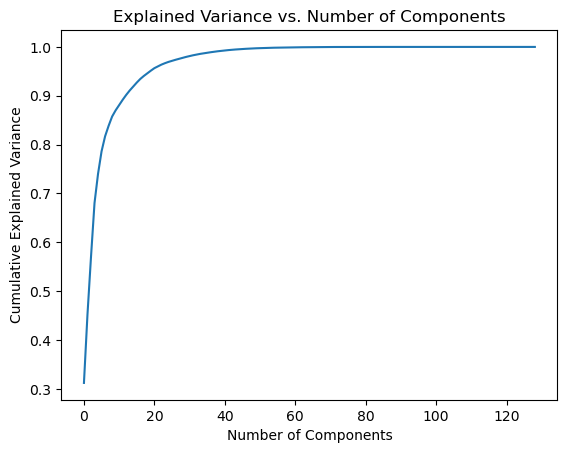

In [45]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


# Model Development

Running Cross-Validation for LogisticRegression...
Model: LogisticRegression
Cross-Validation Accuracy Scores: [0.78481013 0.82278481 0.70886076 0.82278481 0.83544304]
Mean CV Accuracy: 0.7949
Standard Deviation of CV Accuracy: 0.0463

Running Cross-Validation for RandomForest...
Model: RandomForest
Cross-Validation Accuracy Scores: [0.78481013 0.78481013 0.75949367 0.81012658 0.81012658]
Mean CV Accuracy: 0.7899
Standard Deviation of CV Accuracy: 0.0189

Running Cross-Validation for GradientBoosting...
Model: GradientBoosting
Cross-Validation Accuracy Scores: [0.74683544 0.7721519  0.73417722 0.81012658 0.7721519 ]
Mean CV Accuracy: 0.7671
Standard Deviation of CV Accuracy: 0.0261

Running Cross-Validation for AdaBoost...
Model: AdaBoost
Cross-Validation Accuracy Scores: [0.6835443  0.72151899 0.65822785 0.69620253 0.75949367]
Mean CV Accuracy: 0.7038
Standard Deviation of CV Accuracy: 0.0345

Running Cross-Validation for SVC...


/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecat

Model: SVC
Cross-Validation Accuracy Scores: [0.78481013 0.78481013 0.78481013 0.78481013 0.79746835]
Mean CV Accuracy: 0.7873
Standard Deviation of CV Accuracy: 0.0051

Running Cross-Validation for KNeighbors...
Model: KNeighbors
Cross-Validation Accuracy Scores: [0.75949367 0.7721519  0.79746835 0.79746835 0.78481013]
Mean CV Accuracy: 0.7823
Standard Deviation of CV Accuracy: 0.0148

Running Cross-Validation for DecisionTree...
Model: DecisionTree
Cross-Validation Accuracy Scores: [0.6835443  0.74683544 0.65822785 0.73417722 0.6835443 ]
Mean CV Accuracy: 0.7013
Standard Deviation of CV Accuracy: 0.0336

Running Cross-Validation for MLPClassifier...
Model: MLPClassifier
Cross-Validation Accuracy Scores: [0.81012658 0.79746835 0.65822785 0.83544304 0.78481013]
Mean CV Accuracy: 0.7772
Standard Deviation of CV Accuracy: 0.0618

Running Cross-Validation for XGBoost...
Model: XGBoost
Cross-Validation Accuracy Scores: [0.7721519  0.78481013 0.74683544 0.81012658 0.79746835]
Mean CV Accura

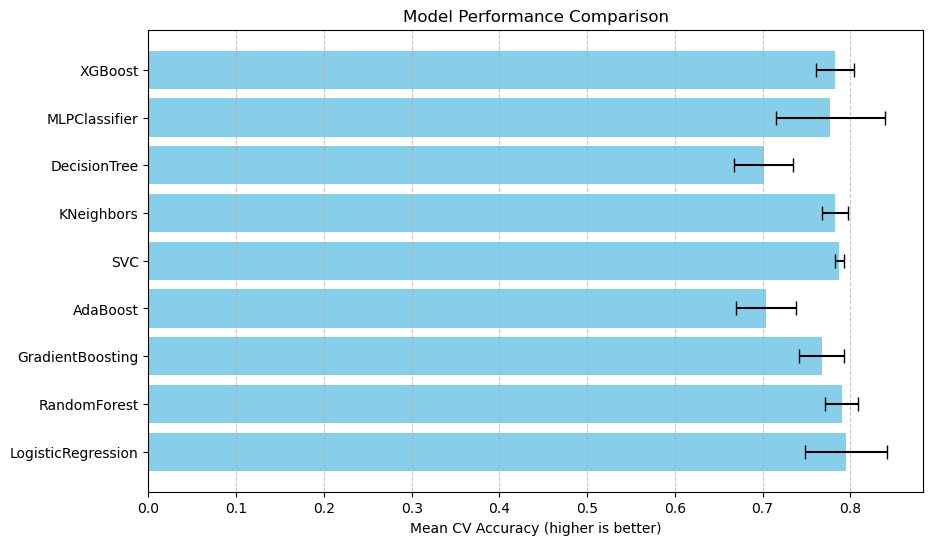

Best Model: LogisticRegression
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        63
         1.0       0.44      0.25      0.32        16

    accuracy                           0.78        79
   macro avg       0.64      0.59      0.60        79
weighted avg       0.75      0.78      0.76        79



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin

class DataFrameTransformer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns)
    

# Load dataset
df = pd.read_excel('TrainDataset2024.xls')

# Replace placeholder missing values
df_cleaned = df.replace(999, np.nan)

# Select features and target
train_data_pcr = df_cleaned.drop(['ID', 'RelapseFreeSurvival (outcome)'], axis=1)
train_data_pcr = train_data_pcr[~train_data_pcr['pCR (outcome)'].isna()]

X_pcr = train_data_pcr.drop(columns=['pCR (outcome)'], axis=1)
y_pcr = train_data_pcr['pCR (outcome)']

categorical_vars = X_pcr.columns[(X_pcr.nunique() > 2) & (X_pcr.nunique() <= 5)]

# One-hot encode the categorical variables
X_pcr_encoded = pd.get_dummies(X_pcr, columns=categorical_vars, drop_first=True)

# Identify continuous and categorical variables
continuous_vars = X_pcr_encoded.columns[X_pcr_encoded.nunique() > 5]
categorical_vars = X_pcr_encoded.columns[X_pcr_encoded.nunique() <= 5]


preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=2)),  # Step 1: Impute missing values
    ('to_dataframe', DataFrameTransformer(columns=X_pcr_encoded.columns)),
    ('scaler', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), continuous_vars),  # Scale continuous variables
            ('cat', 'passthrough', categorical_vars)  # Use already one-hot encoded variables
        ]
    ))
])

# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Create pipelines for each classifier
pipelines = {name: Pipeline([('preprocessor', preprocessor), ('classifier', clf)]) for name, clf in classifiers.items()}

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pcr_encoded, y_pcr, test_size=0.2, random_state=42)

# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(accuracy_score)

results = {}

for name, pipeline in pipelines.items():
    print(f"Running Cross-Validation for {name}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(pipeline, X_pcr_encoded, y_pcr, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[name] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Accuracy (higher is better)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = pipelines[best_model_name]
best_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_pipeline.predict(X_val)

# Print classification report
print(f"Best Model: {best_model_name}")
print(classification_report(y_val, y_pred))


/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


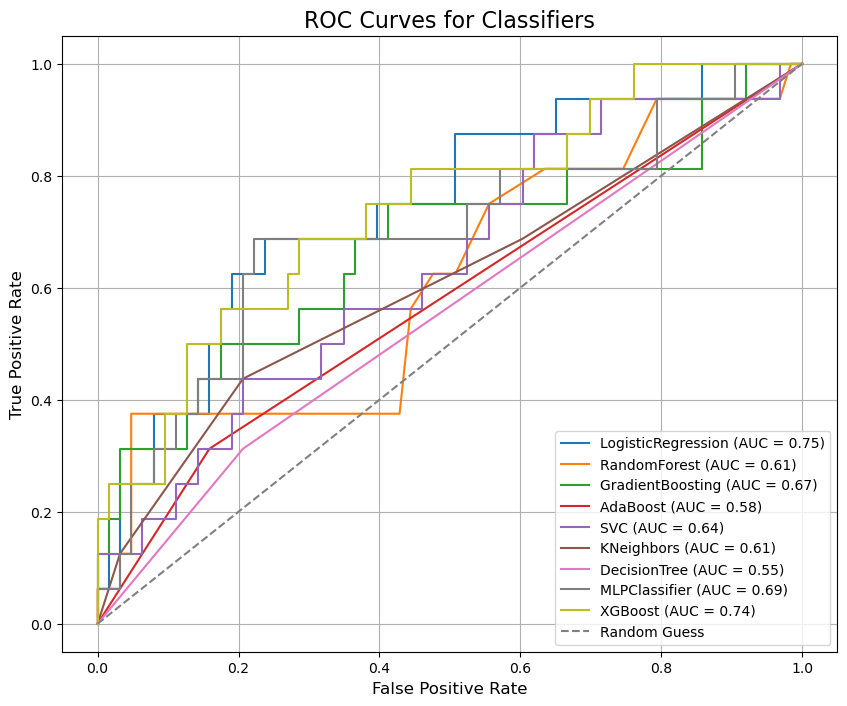

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        63
         1.0       0.44      0.25      0.32        16

    accuracy                           0.78        79
   macro avg       0.64      0.59      0.60        79
weighted avg       0.75      0.78      0.76        79

------------------------------------------------------------
Classification Report for RandomForest:

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88        63
         1.0       0.33      0.06      0.11        16

    accuracy                           0.78        79
   macro avg       0.57      0.52      0.49        79
weighted avg       0.71      0.78      0.72        79

------------------------------------------------------------
Classification Report for GradientBoosting:

              precision    recall  f1-score   support

         0.0       0.84      0.89   

/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/Anaconda/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report

# Initialize a dictionary to store ROC data
roc_data = {}

# Loop through models and evaluate ROC AUC
plt.figure(figsize=(10, 8))
for name, pipeline in pipelines.items():
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Get predicted probabilities or decision scores
    if hasattr(pipeline['classifier'], "predict_proba"):
        y_scores = pipeline.predict_proba(X_val)[:, 1]
    else:  # For classifiers like SVM, use decision_function
        y_scores = pipeline.decision_function(X_val)
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# Add labels, title, and legend
plt.title('ROC Curves for Classifiers', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print classification reports for all models
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_val)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_pred))
    print("-" * 60)
